In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_excel("/home/pavankumar/data_sci_dec/datasets/Doctor_fee_consultation/Final_Train.xlsx")
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [4]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [5]:
df.shape

(5961, 7)

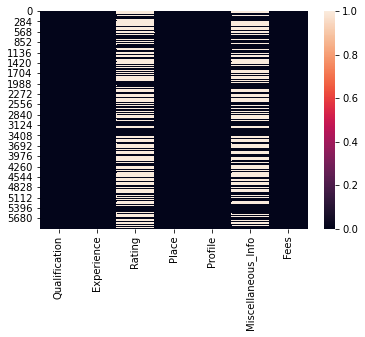

In [6]:
sns.heatmap(df.isnull())

In [7]:
df['Rating'].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
90%      66
92%      66
91%      60
89%      42
88%      41
85%      27
82%      23
86%      21
83%      21
80%      19
77%      16
87%      14
79%      13
84%      13
81%      12
67%      12
76%       9
71%       9
75%       8
73%       8
74%       7
60%       7
78%       6
68%       5
56%       5
70%       4
69%       4
57%       3
72%       3
55%       2
62%       2
64%       2
63%       2
33%       2
45%       1
40%       1
7%        1
65%       1
47%       1
58%       1
53%       1
36%       1
48%       1
Name: Rating, dtype: int64

In [8]:
df['Place'].value_counts()

HSR Layout, Bangalore          75
Andheri West, Mumbai           70
Dwarka, Delhi                  67
Banjara Hills, Hyderabad       64
Mulund West, Mumbai            54
                               ..
Kovalam, Thiruvananthapuram     1
Malumichampatti, Coimbatore     1
Cunningham Road, Bangalore      1
Kakkanad West, Ernakulam        1
PMG Jn, Thiruvananthapuram      1
Name: Place, Length: 877, dtype: int64

In [9]:
maxim = 1
for i in df['Place'] :
    try:
        if len(i.split(',')) > maxim:
             maxim = len(i.split(','))
    except:
        pass
print("\n\nMaximum Title in a Cell : ", maxim)  



Maximum Title in a Cell :  3


In [10]:
maxim = 1
for i in df['Qualification'] :
#     try:
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
#     except:
#         pass
print("\n\nMaximum Title in a Cell : ", maxim)  



Maximum Title in a Cell :  10


In [11]:
maxim = 1
for i in df['Profile'] :
#     try:
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
#     except:
#         pass
print("\n\nMaximum Title in a Cell : ", maxim)  



Maximum Title in a Cell :  1


In [12]:
pl1=[]
pl2=[]
pl3=[]
for i in df['Place'] :
    if pd.isna(i):
        pl1.append("OTHER")
        pl2.append("OTHER")
        pl3.append("OTHER")
    else:
        try:
            pl1.append(i.split(',')[0])
        except:
            pl1.append('NONE')
        try:
            pl2.append(i.split(',')[1])
        except:
            pl2.append('NONE')
        try:
            pl3.append(i.split(',')[2])
        except:
            pl3.append('NONE')


In [13]:
len(pl1)

5961

In [14]:
new_df={}
new_df['Place1']=pl1
new_df['Place2']=pl2
new_df['Place3']=pl3
tst=pd.DataFrame(new_df)

In [15]:
df1=pd.concat([df,tst],axis=1)
df1

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Place1,Place2,Place3
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,NONE
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,NONE
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,NONE
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,NONE
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,NONE
...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,Bangalore,NONE
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,Nungambakkam,Chennai,NONE
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,Delhi,NONE
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,Vileparle West,Mumbai,NONE


In [16]:
df1.loc[df1['Place'].isnull(),:]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Place1,Place2,Place3
91,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
502,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
599,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
605,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
724,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
1002,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
1083,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
1210,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
2078,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
2178,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER


In [17]:
len(df1[(df1['Profile']=='Dermatologists') & (df1['Experience']=='0 years experience')])

35

In [18]:
df1[(df1['Profile']=='Dermatologists') & (df1['Experience']=='0 years experience') & (pd.isnull(df1['Place']))]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Place1,Place2,Place3
91,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
502,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
599,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
605,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
724,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
1002,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
1083,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
1210,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
2078,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER
2178,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,100,OTHER,OTHER,OTHER


In [19]:
df1.drop('Place',axis=1,inplace=True)

In [20]:
q1=[]
q2=[]
q3=[]
q4=[]
q5=[]
q6=[]
q7=[]
q8=[]
q9=[]
q10=[]

for i in df['Qualification'] :
    try:
        q1.append(i.split(',')[0])
    except:
        q1.append('NONE')
    try:
        q2.append(i.split(',')[1])
    except:
        q2.append('NONE')
    try:
        q3.append(i.split(',')[2])
    except:
        q3.append('NONE')
    try:
        q4.append(i.split(',')[3])
    except:
        q4.append('NONE')
    try:
        q5.append(i.split(',')[4])
    except:
        q5.append('NONE')
    try:
        q6.append(i.split(',')[5])
    except:
        q6.append('NONE')
    try:
        q7.append(i.split(',')[6])
    except:
        q7.append('NONE')
    try:
        q8.append(i.split(',')[7])
    except:
        q8.append('NONE')
    try:
        q9.append(i.split(',')[8])
    except:
        q9.append('NONE')
    try:
        q10.append(i.split(',')[9])
    except:
        q10.append('NONE')
df1['Qualification1']=q1
df1['Qualification2']=q2
df1['Qualification3']=q3
df1['Qualification4']=q4
df1['Qualification5']=q5
df1['Qualification6']=q6
df1['Qualification7']=q7
df1['Qualification8']=q8
df1['Qualification9']=q9
df1['Qualification10']=q10
df1.drop('Qualification',axis=1,inplace=True)

In [21]:
int(df1['Experience'][0].split(' ')[0])

24

In [22]:
for i in range(len(df1['Experience'])):
    df1['Experience'][i]=int(df1['Experience'][i].split(' ')[0])
df1

,Experience,Rating,Profile,Miscellaneous_Info,Fees,Place1,Place2,Place3,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10
0,24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,NONE,BHMS,MD - Homeopathy,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1,12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,NONE,BAMS,MD - Ayurveda Medicine,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2,9,NaN,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,NONE,MBBS,MS - Otorhinolaryngology,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3,12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,NONE,BSc - Zoology,BAMS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4,20,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,NONE,BAMS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98%,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,Bangalore,NONE,MBBS,MS - ENT,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
5957,33,NaN,General Medicine,NaN,100,Nungambakkam,Chennai,NONE,MBBS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
5958,41,97%,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,Delhi,NONE,MBBS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
5959,15,90%,General Medicine,General Medical Consultation Viral Fever Treat...,100,Vileparle West,Mumbai,NONE,MBBS,MD - General Medicine,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [23]:
# Dropping 'Rating','Miscellaneous_Info' having more than 50% are null values

In [24]:
df1.drop(['Rating','Miscellaneous_Info'],axis=1,inplace=True)

In [25]:
df1

,Experience,Profile,Fees,Place1,Place2,Place3,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10
0,24,Homeopath,100,Kakkanad,Ernakulam,NONE,BHMS,MD - Homeopathy,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1,12,Ayurveda,350,Whitefield,Bangalore,NONE,BAMS,MD - Ayurveda Medicine,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2,9,ENT Specialist,300,Mathikere - BEL,Bangalore,NONE,MBBS,MS - Otorhinolaryngology,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3,12,Ayurveda,250,Bannerghatta Road,Bangalore,NONE,BSc - Zoology,BAMS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4,20,Ayurveda,250,Keelkattalai,Chennai,NONE,BAMS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,ENT Specialist,300,Basavanagudi,Bangalore,NONE,MBBS,MS - ENT,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
5957,33,General Medicine,100,Nungambakkam,Chennai,NONE,MBBS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
5958,41,General Medicine,600,Greater Kailash Part 2,Delhi,NONE,MBBS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
5959,15,General Medicine,100,Vileparle West,Mumbai,NONE,MBBS,MD - General Medicine,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE


### Lable Encoding

In [26]:
df1.drop(['Experience','Fees'],axis=1).columns

Index(['Profile', 'Place1', 'Place2', 'Place3', 'Qualification1',
       'Qualification2', 'Qualification3', 'Qualification4', 'Qualification5',
       'Qualification6', 'Qualification7', 'Qualification8', 'Qualification9',
       'Qualification10'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df1.drop(['Experience','Fees'],axis=1).columns:
    df1[i]=le.fit_transform(df1[i])
df1

,Experience,Profile,Fees,Place1,Place2,Place3,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10
0,24,5,100,296,4,1,8,252,405,209,95,31,12,6,4,1
1,12,0,350,856,0,1,5,241,405,209,95,31,12,6,4,1
2,9,3,300,452,0,1,79,334,405,209,95,31,12,6,4,1
3,12,0,250,68,0,1,12,7,405,209,95,31,12,6,4,1
4,20,0,250,335,1,1,5,425,405,209,95,31,12,6,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,3,300,70,0,1,79,328,405,209,95,31,12,6,4,1
5957,33,4,100,535,1,1,79,425,405,209,95,31,12,6,4,1
5958,41,4,600,215,3,1,79,425,405,209,95,31,12,6,4,1
5959,15,4,100,841,6,1,79,249,405,209,95,31,12,6,4,1


In [28]:
df1.dtypes

Experience         object
Profile             int64
Fees                int64
Place1              int64
Place2              int64
Place3              int64
Qualification1      int64
Qualification2      int64
Qualification3      int64
Qualification4      int64
Qualification5      int64
Qualification6      int64
Qualification7      int64
Qualification8      int64
Qualification9      int64
Qualification10     int64
dtype: object

In [29]:
df1['Experience']=df1['Experience'].astype('int')

In [30]:
df1.dtypes

Experience         int64
Profile            int64
Fees               int64
Place1             int64
Place2             int64
Place3             int64
Qualification1     int64
Qualification2     int64
Qualification3     int64
Qualification4     int64
Qualification5     int64
Qualification6     int64
Qualification7     int64
Qualification8     int64
Qualification9     int64
Qualification10    int64
dtype: object

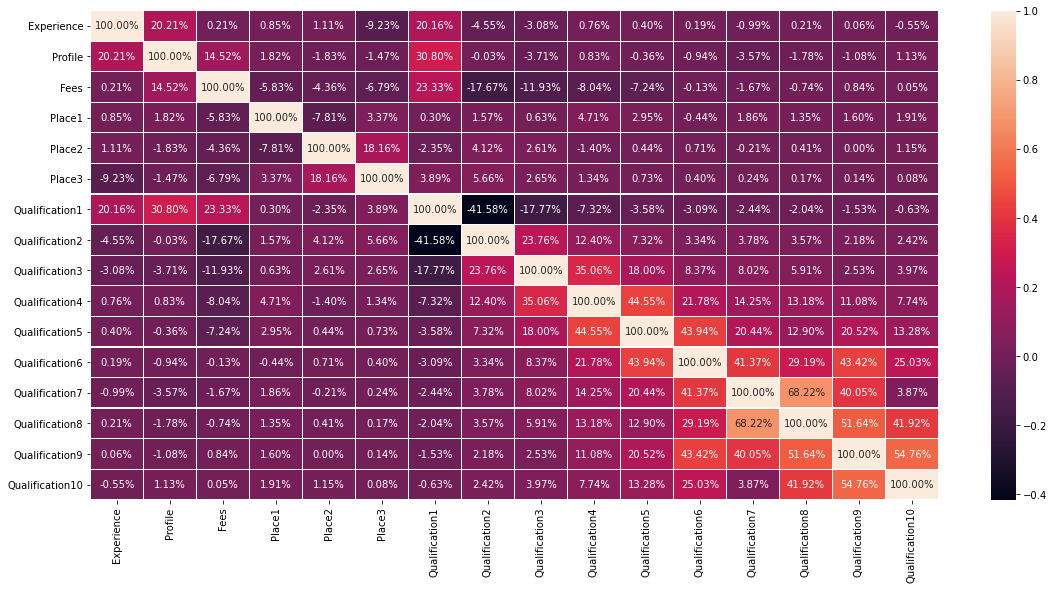

In [31]:
plt.figure(figsize=(19,9))
sns.heatmap(df1.corr(),annot=True,fmt='0.2%',linewidths=0.2)

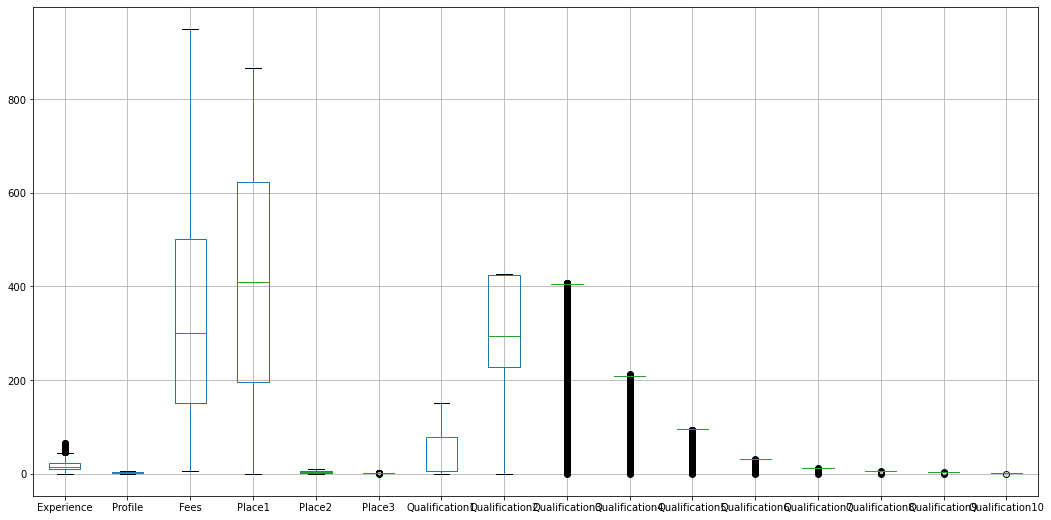

In [32]:
df1.boxplot(figsize=(18,9))

In [33]:
df1.skew()

Experience          0.991089
Profile             0.108803
Fees                0.751870
Place1              0.109489
Place2              0.113859
Place3             13.875213
Qualification1      0.068299
Qualification2     -0.616841
Qualification3     -2.241426
Qualification4     -4.988445
Qualification5     -9.457908
Qualification6    -17.265436
Qualification7    -28.300130
Qualification8    -39.194718
Qualification9    -46.967280
Qualification10   -77.207513
dtype: float64

### Model Generation

In [34]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [35]:
x=df1.drop('Fees',axis=1)
target=df1['Fees']

In [36]:
# for best random state
best_state=0
accu=0
for i in range(30,250):
    X_train, X_test, y_train, y_test = train_test_split(x,target, test_size=0.25,random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    rscrore=r2_score(y_test,pred)
    crv=cross_val_score(LinearRegression(),X_train,y_train,cv=10).mean()
    if rscrore>accu:
        accu=rscrore
        best_state=i
print(f"Final accuracy is {accu*100} \n Cross Validate score is {(crv*100)} \n# difference is {(accu*100)-(crv*100)} \n best random state is{best_state}")

Final accuracy is 11.442461560410223 
 Cross Validate score is 7.709213037502244 
# difference is 3.733248522907979 
 best random state is182


In [37]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [38]:
x=ss.fit_transform(x)
x=pd.DataFrame(x)

In [39]:
# for best random state
best_state=0
accu=0
for i in range(30,250):
    X_train, X_test, y_train, y_test = train_test_split(x,target, test_size=0.25,random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    rscrore=r2_score(y_test,pred)
    crv=cross_val_score(LinearRegression(),X_train,y_train,cv=10).mean()
    if rscrore>accu:
        accu=rscrore
        best_state=i
print(f"Final accuracy is {accu*100} \n Cross Validate score is {(crv*100)} \n# difference is {(accu*100)-(crv*100)} \n best random state is{best_state}")

Final accuracy is 11.442461560410255 
 Cross Validate score is 7.709213037502252 
# difference is 3.733248522908003 
 best random state is182


### Pipeline

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x,target, test_size=0.25,random_state=182)

In [41]:
from sklearn.pipeline import Pipeline

In [42]:
parameters_sgd={
 'penalty': ['l1','l2','elasticnet'],
 'alpha': [0.0001,0.001,0.01,0.1,1],
    'max_iter':[1000,2000],
}
parameters_rndf={
 'criterion': ['mse','mae'],
 'max_features': ['auto','sqrt'],
 'n_estimators': list(np.arange(100,150)),
 'random_state': [246],
    'max_depth':[5],
}
parameters_deci_tree={
 'criterion': ['mse','mae'],
#  'splitter':['best','random'],
 'max_features': ['auto','sqrt'],
 'max_depth':[5],
 'random_state': [246]}
parameters_knn_reg={
    'n_neighbors': list(np.arange(5,10)),
    'weights':['uniform','distance'],
    
}
parameters_svr_reg={
    'kernel': ['linear','poly','rbf'],
#     'gamma':['auto','scale'],
#     'max_iter':[500,700,900,1100,1300,1500,1700],
    'max_iter':[500,700],
    
}
parameters_linear_reg = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [43]:
parameter_lis=[parameters_linear_reg,parameters_knn_reg,parameters_svr_reg,parameters_deci_tree,parameters_sgd]
models=[LinearRegression(),KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),SGDRegressor()]
models_name=['LinearRegression','KNeighborsRegressor','SVR','DecisionTreeRegressor','SGDRegressor']
lis_pipes=[]    
best_score=0
best_model_name=''
cv_score=0
for n,model,model_name,parameter in zip(np.arange(1,6),models,models_name,parameter_lis):
    lis_pipes.append(Pipeline([(model_name,GridSearchCV(estimator=model,param_grid=parameter,cv=5,scoring='r2'))]))

for model in lis_pipes:
    gsv=model.fit(X_train,y_train)
    pred=gsv[0].best_estimator_.predict(X_test)
    r2score=r2_score(y_test,pred)
    crv=cross_val_score(model,X_train,y_train,cv=2).mean()
    print(f"Final accuracy is {r2score*100} \n\nCross Validate score is {(crv*100)}\n\n{gsv[0].best_estimator_}\n\n{gsv[0].best_params_}\n\n=====================================================")
    if r2score>best_score and crv>0:
        best_score=r2score
        best_model_name=[]
        best_model_name.append(gsv[0])
        
print(f"Best model name is :  {best_model_name[0]}")

Final accuracy is 11.442461560410255 

Cross Validate score is -15124.998653884011

LinearRegression()

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

Final accuracy is 13.079857322118283 

Cross Validate score is 6.49884436076496

KNeighborsRegressor(n_neighbors=9)

{'n_neighbors': 9, 'weights': 'uniform'}

Final accuracy is -3.7210943572784316 

Cross Validate score is -2.516180251922473

SVR(max_iter=500)

{'kernel': 'rbf', 'max_iter': 500}

Final accuracy is 15.106097062497959 

Cross Validate score is 12.545990508261722

DecisionTreeRegressor(max_depth=5, max_features='auto', random_state=246)

{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'random_state': 246}

Final accuracy is 8.935055814298643 

Cross Validate score is 6.220747241015051

SGDRegressor(alpha=1, max_iter=2000, penalty='elasticnet')

{'alpha': 1, 'max_iter': 2000, 'penalty': 'elasticnet'}

Best model name is :  GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_gri

In [44]:
######  criterion{“mse”, “mae”}, default=”mse”
def rndtree(a,b):
    accu=0
    best_n=0
    for i in a:
        mod=RandomForestRegressor(n_estimators=i,random_state=b)
        mod.fit(X_train,y_train)
        pred = mod.predict(X_test)
        accuracy=r2_score(y_test,pred)
        if accuracy>accu:
            accu=accuracy
            best_n=i
    mod=RandomForestRegressor(n_estimators=best_n,random_state=b)
    mod.fit(X_train,y_train)
    predictions = mod.predict(X_test)
    print(r2_score(y_test,predictions)*100)
    print((cross_val_score(RandomForestRegressor(),X_train,y_train,cv=5).mean()*100))
    print("best n is ", best_n)

In [45]:
rndtree(list(np.arange(120,170)),182)

21.773442207186612
15.766694196690398
best n is  146


In [46]:
def rftree(a,b,c):
    mod=RandomForestRegressor(n_estimators=i,random_state=b,criterion=c)
    mod.fit(X_train,y_train)
    pred = mod.predict(X_test)
    print(r2_score(y_test,pred)*100)
    print((cross_val_score(RandomForestRegressor(n_estimators=i,random_state=b,criterion=c),X_train,y_train,cv=5).mean()*100))

In [47]:
rftree(146,182,'mae')

21.2786855173264
15.628225259144655


In [48]:
rftree(146,182,'mse')

21.71155972160108
15.38977939833581


In [49]:
rfc=RandomForestRegressor(n_estimators=146,random_state=182,criterion='mse')
rfc.fit(X_train,y_train)

RandomForestRegressor(n_estimators=146, random_state=182)

# Conclusion: Best Model DescisionRegressor from all above models

In [50]:
import pickle
file_name='doctor_fees.pkl'
pickle.dump(rfc,open(file_name,'wb'))

### For Testing on test Data

In [51]:
df_test = pd.read_excel("/home/pavankumar/data_sci_dec/datasets/Doctor_fee_consultation/Final_Test.xlsx")
df_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [52]:
df_test.drop(['Rating','Miscellaneous_Info'],axis=1,inplace=True)
df_test

,Qualification,Experience,Place,Profile
0,MBBS,35 years experience,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,"Porur, Chennai",General Medicine
1985,BDS,12 years experience,"Arekere, Bangalore",Dentist


In [75]:
pl1=[]
pl2=[]
pl3=[]
for i in df_test['Place'] :
    if pd.isna(i):
        pl1.append("OTHER")
        pl2.append("OTHER")
        pl3.append("OTHER")
    else:
        try:
            pl1.append(i.split(',')[0])
        except:
            pl1.append('NONE')
        try:
            pl2.append(i.split(',')[1])
        except:
            pl2.append('NONE')
        try:
            pl3.append(i.split(',')[2])
        except:
            pl3.append('NONE')




new_df={}
new_df['Place1']=pl1
new_df['Place2']=pl2
new_df['Place3']=pl3
tst=pd.DataFrame(new_df)

df11=pd.concat([df_test,tst],axis=1)
df11

,Qualification,Experience,Place,Profile,Place1,Place2,Place3
0,MBBS,35 years experience,"Ghatkopar East, Mumbai",General Medicine,Ghatkopar East,Mumbai,NONE
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,"West Marredpally, Hyderabad",ENT Specialist,West Marredpally,Hyderabad,NONE
2,"MBBS, DDVL",40 years experience,"KK Nagar, Chennai",Dermatologists,KK Nagar,Chennai,NONE
3,BAMS,0 years experience,"New Ashok Nagar, Delhi",Ayurveda,New Ashok Nagar,Delhi,NONE
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,"Kanakpura Road, Bangalore",Dentist,Kanakpura Road,Bangalore,NONE
...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,"Basavanagudi, Bangalore",Ayurveda,Basavanagudi,Bangalore,NONE
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,"Choolai, Chennai",Dermatologists,Choolai,Chennai,NONE
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,"Porur, Chennai",General Medicine,Porur,Chennai,NONE
1985,BDS,12 years experience,"Arekere, Bangalore",Dentist,Arekere,Bangalore,NONE


In [77]:
df11.loc[df11['Place'].isnull(),:]

,Qualification,Experience,Place,Profile,Place1,Place2,Place3
381,Get inspired by remarkable stories of people l...,0 years experience,NaN,Dermatologists,OTHER,OTHER,OTHER
1494,Get inspired by remarkable stories of people l...,0 years experience,NaN,Dermatologists,OTHER,OTHER,OTHER
1644,Get inspired by remarkable stories of people l...,0 years experience,NaN,Dermatologists,OTHER,OTHER,OTHER
1838,Get inspired by remarkable stories of people l...,0 years experience,NaN,Dermatologists,OTHER,OTHER,OTHER
1925,Get inspired by remarkable stories of people l...,0 years experience,NaN,Dermatologists,OTHER,OTHER,OTHER
1930,Get inspired by remarkable stories of people l...,0 years experience,NaN,Dermatologists,OTHER,OTHER,OTHER


In [55]:
df1.drop('Place',axis=1,inplace=True)

In [78]:
maxim = 1
for i in df11['Qualification'] :
#     try:
#     if len(i.split(',')) > maxim:
#          maxim = len(i.split(','))
    if len(i.split(','))>10:
        print([i])
#     except:
#         pass
# print("\n\nMaximum Title in a Cell : ", maxim)  

['BDS, PG Diploma in Conservative, Endodontics and Aesthetic Dentistry, Fellowship In Clinical Cosmetology, PG Diploma In Clinical Cosmetology (PGDCC), MBA - Hospital Management, Diploma in Cosmetic Dentistry, Fellow of Academy of General Education (FAGE), Advanced Retreatment Course in RCT, Advanced Endotontic Course On Root Canal, Certified Course in Oral Surgery, MIDA, Certification in Prosthodontics & Periodontology, Certified Advanced Course in Wisdom Tooth Extraction, Certificate in Cosmetic Dentistry, Fellowship in Aesthetic Dentistry (FAD), Post Graduate Certificate in Endodontics (PGCE)']


In [79]:
df11[df11['Qualification']=='BDS, PG Diploma in Conservative, Endodontics and Aesthetic Dentistry, Fellowship In Clinical Cosmetology, PG Diploma In Clinical Cosmetology (PGDCC), MBA - Hospital Management, Diploma in Cosmetic Dentistry, Fellow of Academy of General Education (FAGE), Advanced Retreatment Course in RCT, Advanced Endotontic Course On Root Canal, Certified Course in Oral Surgery, MIDA, Certification in Prosthodontics & Periodontology, Certified Advanced Course in Wisdom Tooth Extraction, Certificate in Cosmetic Dentistry, Fellowship in Aesthetic Dentistry (FAD), Post Graduate Certificate in Endodontics (PGCE)']

,Qualification,Experience,Place,Profile,Place1,Place2,Place3
1287,"BDS, PG Diploma in Conservative, Endodontics a...",4 years experience,"New Ashok Nagar, Delhi",Dentist,New Ashok Nagar,Delhi,NONE


In [80]:
df11.loc[1287]

Qualification    BDS, PG Diploma in Conservative, Endodontics a...
Experience                                      4 years experience
Place                                       New Ashok Nagar, Delhi
Profile                                                    Dentist
Place1                                             New Ashok Nagar
Place2                                                       Delhi
Place3                                                        NONE
Name: 1287, dtype: object

In [81]:
df11.index[1287]

1287

In [82]:
df11.drop(df11.index[1287],axis=0,inplace=True)

In [85]:
df11.loc[1288]

Qualification    FAMS - Fellowship of the Academy Medicine, MBB...
Experience                                     28 years experience
Place                                      AS Rao Nagar, Hyderabad
Profile                                             ENT Specialist
Place1                                                AS Rao Nagar
Place2                                                   Hyderabad
Place3                                                        NONE
Name: 1288, dtype: object

In [86]:
maxim = 1
for i in df11['Qualification'] :
#     try:
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
#     except:
#         pass
print("\n\nMaximum Title in a Cell : ", maxim) 



Maximum Title in a Cell :  9


In [87]:
q1=[]
q2=[]
q3=[]
q4=[]
q5=[]
q6=[]
q7=[]
q8=[]
q9=[]
q10=[]
for i in df11['Qualification'] :
    try:
        q1.append(i.split(',')[0])
    except:
        q1.append('NONE')
    try:
        q2.append(i.split(',')[1])
    except:
        q2.append('NONE')
    try:
        q3.append(i.split(',')[2])
    except:
        q3.append('NONE')
    try:
        q4.append(i.split(',')[3])
    except:
        q4.append('NONE')
    try:
        q5.append(i.split(',')[4])
    except:
        q5.append('NONE')
    try:
        q6.append(i.split(',')[5])
    except:
        q6.append('NONE')
    try:
        q7.append(i.split(',')[6])
    except:
        q7.append('NONE')
    try:
        q8.append(i.split(',')[7])
    except:
        q8.append('NONE')
    try:
        q9.append(i.split(',')[8])
    except:
        q9.append('NONE')
    try:
        q10.append(i.split(',')[9])
    except:
        q10.append('NONE')
df11['Qualification1']=q1
df11['Qualification2']=q2
df11['Qualification3']=q3
df11['Qualification4']=q4
df11['Qualification5']=q5
df11['Qualification6']=q6
df11['Qualification7']=q7
df11['Qualification8']=q8
df11['Qualification9']=q9
df11['Qualification10']=q10
df11.drop('Qualification',axis=1,inplace=True)

In [88]:
df11

,Experience,Place,Profile,Place1,Place2,Place3,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10
0,35 years experience,"Ghatkopar East, Mumbai",General Medicine,Ghatkopar East,Mumbai,NONE,MBBS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1,31 years experience,"West Marredpally, Hyderabad",ENT Specialist,West Marredpally,Hyderabad,NONE,MBBS,Diploma in Otorhinolaryngology (DLO),NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2,40 years experience,"KK Nagar, Chennai",Dermatologists,KK Nagar,Chennai,NONE,MBBS,DDVL,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3,0 years experience,"New Ashok Nagar, Delhi",Ayurveda,New Ashok Nagar,Delhi,NONE,BAMS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4,16 years experience,"Kanakpura Road, Bangalore",Dentist,Kanakpura Road,Bangalore,NONE,BDS,MDS - Conservative Dentistry & Endodontics,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10 years experience,"Basavanagudi, Bangalore",Ayurveda,Basavanagudi,Bangalore,NONE,BAMS,Doctor of Medicine,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1983,4 years experience,"Choolai, Chennai",Dermatologists,Choolai,Chennai,NONE,MD - Dermatology,Venereology & Leprosy,MBBS,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1984,9 years experience,"Porur, Chennai",General Medicine,Porur,Chennai,NONE,MBBS,MD / MS - Obstetrics & Gynaecology,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1985,12 years experience,"Arekere, Bangalore",Dentist,Arekere,Bangalore,NONE,BDS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [89]:
df11['Experience'].value_counts()

10 years experience    110
8 years experience      98
9 years experience      96
19 years experience     92
7 years experience      89
11 years experience     86
13 years experience     83
14 years experience     81
12 years experience     79
17 years experience     72
18 years experience     70
6 years experience      62
15 years experience     57
16 years experience     51
5 years experience      50
23 years experience     49
21 years experience     48
20 years experience     48
29 years experience     46
4 years experience      43
22 years experience     37
24 years experience     34
3 years experience      33
25 years experience     33
26 years experience     32
0 years experience      31
28 years experience     29
27 years experience     27
36 years experience     27
34 years experience     27
31 years experience     26
38 years experience     23
30 years experience     18
32 years experience     16
44 years experience     16
40 years experience     15
37 years experience     14
3

In [90]:
maxim = 1
for i in df11['Experience'] :
#     try:
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
#     except:
#         pass
print("\n\nMaximum Title in a Cell : ", maxim) 



Maximum Title in a Cell :  1


In [91]:
df11.iloc[1288,]

Experience           7 years experience
Place              Andheri East, Mumbai
Profile                        Ayurveda
Place1                     Andheri East
Place2                           Mumbai
Place3                             NONE
Qualification1                     BAMS
Qualification2                     NONE
Qualification3                     NONE
Qualification4                     NONE
Qualification5                     NONE
Qualification6                     NONE
Qualification7                     NONE
Qualification8                     NONE
Qualification9                     NONE
Qualification10                    NONE
Name: 1289, dtype: object

In [107]:
df11['Experience'][1986]=df11.loc[1986,:][0].split(' ')[0]

In [109]:
for i in range(len(df11['Experience'])):
    if i!=1287:
        df11['Experience'][i]=df11['Experience'][i].split(' ')[0]
df11['Experience']=df11['Experience'].astype('int')

In [110]:
df11['Experience']

0       35
1       31
2       40
3        0
4       16
        ..
1982    10
1983     4
1984     9
1985    12
1986     8
Name: Experience, Length: 1986, dtype: int64

In [113]:
df11.head()

,Experience,Place,Profile,Place1,Place2,Place3,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10
0,35,"Ghatkopar East, Mumbai",General Medicine,Ghatkopar East,Mumbai,NONE,MBBS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1,31,"West Marredpally, Hyderabad",ENT Specialist,West Marredpally,Hyderabad,NONE,MBBS,Diploma in Otorhinolaryngology (DLO),NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2,40,"KK Nagar, Chennai",Dermatologists,KK Nagar,Chennai,NONE,MBBS,DDVL,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3,0,"New Ashok Nagar, Delhi",Ayurveda,New Ashok Nagar,Delhi,NONE,BAMS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4,16,"Kanakpura Road, Bangalore",Dentist,Kanakpura Road,Bangalore,NONE,BDS,MDS - Conservative Dentistry & Endodontics,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [118]:
df11.drop('Place',axis=1,inplace=True)

In [119]:
df11.drop(['Experience'],axis=1).columns

Index(['Profile', 'Place1', 'Place2', 'Place3', 'Qualification1',
       'Qualification2', 'Qualification3', 'Qualification4', 'Qualification5',
       'Qualification6', 'Qualification7', 'Qualification8', 'Qualification9',
       'Qualification10'],
      dtype='object')

In [120]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df11.drop('Experience',axis=1).columns:
    df11[i]=le.fit_transform(df11[i])
df11

,Experience,Profile,Place1,Place2,Place3,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10
0,35,4,142,6,0,48,242,193,88,34,7,2,1,1,0
1,31,3,578,5,0,48,79,193,88,34,7,2,1,1,0
2,40,2,212,1,0,48,28,193,88,34,7,2,1,1,0
3,0,0,373,3,0,1,242,193,88,34,7,2,1,1,0
4,16,1,231,0,0,2,157,193,88,34,7,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,0,58,0,0,1,86,193,88,34,7,2,1,1,0
1983,4,2,96,1,0,52,240,128,88,34,7,2,1,1,0
1984,9,4,424,1,0,48,153,193,88,34,7,2,1,1,0
1985,12,1,26,0,0,2,242,193,88,34,7,2,1,1,0


In [121]:
file = open("doctor_fees.pkl",'rb')
object_file = pickle.load(file)

In [122]:
object_file.predict(df11)

array([261.02739726, 261.02739726, 284.5890411 , ..., 284.5890411 ,
       308.56164384, 284.5890411 ])